In [1]:
"""
多边形棱柱总磁场异常正演
"""
import matplotlib.pyplot as plt
from geoist import gridder
from geoist.inversion import geometry
from geoist.pfm import polyprism, giutils
from geoist.vis import giplt


In [2]:
#模型参数设置
inc, dec = 30, -15
# 多边形棱柱体设置
bounds = [-5000, 5000, -5000, 5000, 0, 5000]
area = bounds[:4]
#axis = plt.figure().gca()
#plt.axis('scaled')
verts = [[-2000, -3000], [-2000, 2000], [3000, 3000], [2000, -3000]]
model = [
    geometry.PolygonalPrism(
        #giplt.draw_polygon(area, axis, xy2ne=True),
        verts,
        # Use only induced magnetization
        #0, 2000, {'magnetization': 2})]
        0, 2000, {'magnetization': giutils.ang2vec(2, inc, dec)})]


In [3]:
#观测数据设置
shape = (100, 100)
xp, yp, zp = gridder.regular(area, shape, z=-500)

In [4]:
# 计算总磁场异常
tf = polyprism.tf(xp, yp, zp, model, inc, dec)

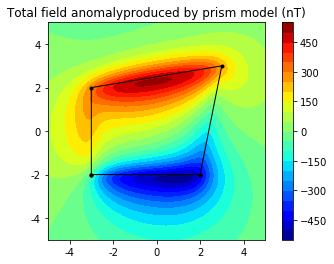

In [5]:
# 画图
plt.figure()
plt.axis('scaled')
plt.title("Total field anomalyproduced by prism model (nT)")
giplt.contourf(yp, xp, tf, shape, 20)
plt.colorbar()
for p in model:
    giplt.polygon(p, '.-k', xy2ne=True)
giplt.set_area(area)
giplt.m2km()
plt.show()